# YOLOv8 Model Conversion and Deployment with OpenVINO

This document outlines the process of converting a YOLOv8 model to ONNX format, quantizing it, and deploying it using OpenVINO. These steps provide several benefits, including improved performance and compatibility with various hardware platforms.

## Converting YOLOv8 to ONNX

The first step is to convert the YOLOv8 model to ONNX format. ONNX is an open format that allows interoperability between different deep learning frameworks. This conversion can be performed using the following steps:

1. Train or obtain the YOLOv8 model using a deep learning framework, such as PyTorch or TensorFlow.
2. Export the trained YOLOv8 model to ONNX format using the provided export functionality in the chosen framework.

## Quantization

Quantization is a process of reducing the precision of the model's weights and activations, which can lead to reduced memory and computation requirements. This step is optional but can provide benefits such as faster inference and lower resource utilization.

1. Use quantization tools, often provided by the deep learning framework, to quantize the YOLOv8 model. This process will convert the model from a floating-point representation to a fixed-point or INT8 format.
2. Verify that the quantized model maintains acceptable accuracy for your use case.

## Deployment with OpenVINO

OpenVINO (Open Visual Inference and Neural Network Optimization) is an Intel toolkit that optimizes and deploys deep learning models for various Intel hardware platforms. Deploying the YOLOv8 model with OpenVINO offers several advantages:

1. **Performance**: OpenVINO is optimized for Intel CPUs, GPUs, FPGAs, and VPUs, resulting in high-performance inference on a wide range of Intel hardware.
2. **Heterogeneous Execution Support**: OpenVINO provides a unified API for deploying models across different Intel hardware, making it easier to target multiple platforms.
3. **Model Optimizer**: OpenVINO includes a Model Optimizer that imports, converts, and optimizes models from popular deep learning frameworks.
4. **Ease of Use**: OpenVINO provides a user-friendly toolkit with extensive documentation and tutorials for model deployment.

## Conclusion

Converting a YOLOv8 model to ONNX, quantizing it, and deploying it with OpenVINO offers a powerful solution for real-time object detection. It combines the flexibility of YOLOv8 with the performance optimization of OpenVINO, making it suitable for a wide range of applications.


In [1]:
import cv2 as cv
from ultralytics import YOLO
import numpy as np
import onnxruntime as rt
from IPython.display import Image, display
import matplotlib.pyplot as plt
import time
import tf2onnx
import onnx
from onnxruntime.quantization import quantize_dynamic, QuantType
import onnxruntime as rt

## Benefits of OpenVINO

1. **Performance**: OpenVINO delivers high-performance inference by utilizing the power of Intel CPUs, integrated and discrete GPUs, and FPGAs.

2. **Support for Heterogeneous Execution**: OpenVINO provides an API to write once and deploy on any supported Intel hardware (CPU, GPU, FPGA, VPU, etc).

3. **Model Optimizer**: OpenVINO provides a Model Optimizer that imports, converts, and optimizes models from popular deep learning frameworks such as PyTorch, TensorFlow, TensorFlow Lite, Keras, ONNX, PaddlePaddle, and Caffe.

4. **Ease of Use**: The toolkit comes with more than 80 tutorial notebooks (including YOLOv8 optimization) teaching different aspects of the toolkit.


### Original Model

In [2]:
# Load the Ultralytics YOLO model
model_path = r"C:\Users\ammar\My-Folder\Computer Vision\Computer Vision Course\YOLO\Licence-Plate-Detection-and-Recognition-using-YOLO-V8\runs\detect\train3\weights\best.pt"
model = YOLO(model_path)

In [3]:
img = r"C:\Users\ammar\My-Folder\Computer Vision\Computer Vision Course\YOLO\Licence-Plate-Detection-and-Recognition-using-YOLO-V8\Car_License_Plates-1\train\images\Cars2_png.rf.7ae57b5bb53835463ae63245cacfa0b7.jpg"

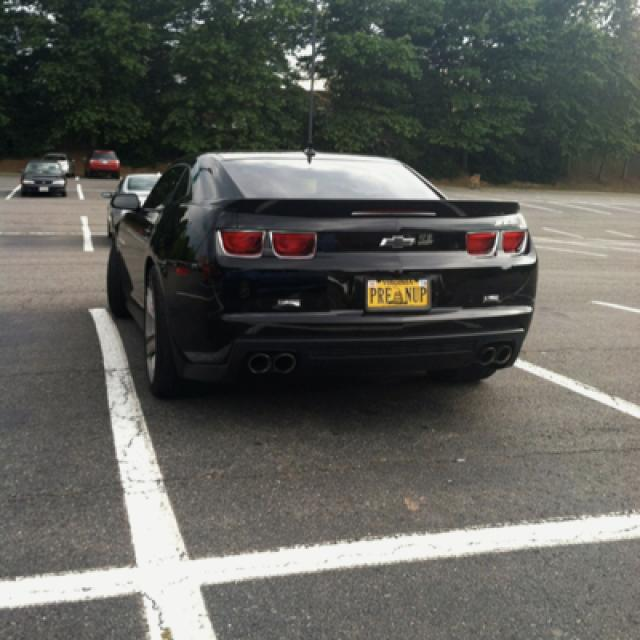

In [4]:
Image(r"C:\Users\ammar\My-Folder\Computer Vision\Computer Vision Course\YOLO\Licence-Plate-Detection-and-Recognition-using-YOLO-V8\Car_License_Plates-1\train\images\Cars2_png.rf.7ae57b5bb53835463ae63245cacfa0b7.jpg")

In [5]:
t1 = time.time()
n = 10
for _ in range(n):
    results = model.predict(img)

print(f"the Time taken for {n} prediction is : {time.time() - t1}")


C:\Users\ammar\anaconda3\envs\test\lib\site-packages\torch\cuda\__init__.py:107: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\c10\cuda\CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0

image 1/1 C:\Users\ammar\My-Folder\Computer Vision\Computer Vision Course\YOLO\Licence-Plate-Detection-and-Recognition-using-YOLO-V8\Car_License_Plates-1\train\images\Cars2_png.rf.7ae57b5bb53835463ae63245cacfa0b7.jpg: 640x640 1 licence, 3940.6ms
Speed: 23.4ms preprocess, 3940.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 C:\Users\ammar\My-Folder\Computer Vision\Computer Vision Course\YOLO\Licence-Plate-Detection-and-Recognition-using-YOLO-V8\Car_License_Plates-1\train\images\Cars2_png.rf.7ae5

the Time taken for 10 prediction is : 47.9280526638031


### OpenVINO

In [6]:
# Export the model
model.export(format='openvino')  # creates 'yolov8n_openvino_model/'

Ultralytics YOLOv8.0.195  Python-3.8.17 torch-2.0.1+cu117 CPU (Intel Core(TM) i7-8550U 1.80GHz)

PyTorch: starting from 'C:\Users\ammar\My-Folder\Computer Vision\Computer Vision Course\YOLO\Licence-Plate-Detection-and-Recognition-using-YOLO-V8\runs\detect\train3\weights\best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 5, 8400) (130.4 MB)

ONNX: starting export with onnx 1.14.1 opset 17...


============= Diagnostic Run torch.onnx.export version 2.0.1+cu117 =============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================



ONNX: export success  21.4s, saved as 'C:\Users\ammar\My-Folder\Computer Vision\Computer Vision Course\YOLO\Licence-Plate-Detection-and-Recognition-using-YOLO-V8\runs\detect\train3\weights\best.onnx' (260.1 MB)

OpenVINO: starting export with openvino 2023.1.0-12185-9e6b00e51cd-releases/2023/1...
OpenVINO: export success  43.0s, saved as 'C:\Users\ammar\My-Folder\Computer Vision\Computer Vision Course\YOLO\Licence-Plate-Detection-and-Recognition-using-YOLO-V8\runs\detect\train3\weights\best_openvino_model\' (260.3 MB)

Export complete (77.2s)
Results saved to C:\Users\ammar\My-Folder\Computer Vision\Computer Vision Course\YOLO\Licence-Plate-Detection-and-Recognition-using-YOLO-V8\runs\detect\train3\weights
Predict:         yolo predict task=detect model=C:\Users\ammar\My-Folder\Computer Vision\Computer Vision Course\YOLO\Licence-Plate-Detection-and-Recognition-using-YOLO-V8\runs\detect\train3\weights\best_openvino_model imgsz=640  
Validate:        yolo val task=detect model=C:\Users\a

'C:\\Users\\ammar\\My-Folder\\Computer Vision\\Computer Vision Course\\YOLO\\Licence-Plate-Detection-and-Recognition-using-YOLO-V8\\runs\\detect\\train3\\weights\\best_openvino_model'

In [7]:
# Load the e'C:\\Users\\ammar\\My-Folder\\Computer Vision\\Computer Vision Course\\YOLO\\Licence-Plate-Detection-and-Recognition-using-YOLO-V8\\runs\\detect\\train3\\weights\\best_openvino_model'xported OpenVINO model
ov_model = YOLO('C:\\Users\\ammar\\My-Folder\\Computer Vision\\Computer Vision Course\\YOLO\\Licence-Plate-Detection-and-Recognition-using-YOLO-V8\\runs\\detect\\train3\\weights\\best_openvino_model')


In [18]:
t1 = time.time()
n = 10
for _ in range(n):
    
    # Run inference
    ov_results = ov_model(img)

print(f"the Time taken for {n} prediction is : {time.time() - t1}")



image 1/1 C:\Users\ammar\My-Folder\Computer Vision\Computer Vision Course\YOLO\Licence-Plate-Detection-and-Recognition-using-YOLO-V8\Car_License_Plates-1\train\images\Cars2_png.rf.7ae57b5bb53835463ae63245cacfa0b7.jpg: 640x640 1 licence, 1001.5ms
Speed: 13.6ms preprocess, 1001.5ms inference, 7.2ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 C:\Users\ammar\My-Folder\Computer Vision\Computer Vision Course\YOLO\Licence-Plate-Detection-and-Recognition-using-YOLO-V8\Car_License_Plates-1\train\images\Cars2_png.rf.7ae57b5bb53835463ae63245cacfa0b7.jpg: 640x640 1 licence, 914.1ms
Speed: 16.8ms preprocess, 914.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 C:\Users\ammar\My-Folder\Computer Vision\Computer Vision Course\YOLO\Licence-Plate-Detection-and-Recognition-using-YOLO-V8\Car_License_Plates-1\train\images\Cars2_png.rf.7ae57b5bb53835463ae63245cacfa0b7.jpg: 640x640 1 licence, 978.1ms
Speed: 15.1ms preprocess, 978.1ms inference, 4.0ms postprocess

the Time taken for 10 prediction is : 10.363715648651123


### ONNX

In [9]:
model.export(format="onnx", imgsz=[640,640])

Ultralytics YOLOv8.0.195  Python-3.8.17 torch-2.0.1+cu117 CPU (Intel Core(TM) i7-8550U 1.80GHz)

PyTorch: starting from 'C:\Users\ammar\My-Folder\Computer Vision\Computer Vision Course\YOLO\Licence-Plate-Detection-and-Recognition-using-YOLO-V8\runs\detect\train3\weights\best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 5, 8400) (130.4 MB)

ONNX: starting export with onnx 1.14.1 opset 17...


============= Diagnostic Run torch.onnx.export version 2.0.1+cu117 =============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================



ONNX: export success  19.9s, saved as 'C:\Users\ammar\My-Folder\Computer Vision\Computer Vision Course\YOLO\Licence-Plate-Detection-and-Recognition-using-YOLO-V8\runs\detect\train3\weights\best.onnx' (260.1 MB)

Export complete (32.6s)
Results saved to C:\Users\ammar\My-Folder\Computer Vision\Computer Vision Course\YOLO\Licence-Plate-Detection-and-Recognition-using-YOLO-V8\runs\detect\train3\weights
Predict:         yolo predict task=detect model=C:\Users\ammar\My-Folder\Computer Vision\Computer Vision Course\YOLO\Licence-Plate-Detection-and-Recognition-using-YOLO-V8\runs\detect\train3\weights\best.onnx imgsz=640  
Validate:        yolo val task=detect model=C:\Users\ammar\My-Folder\Computer Vision\Computer Vision Course\YOLO\Licence-Plate-Detection-and-Recognition-using-YOLO-V8\runs\detect\train3\weights\best.onnx imgsz=640 data=/content/Car_License_Plates-1/data.yaml  
Visualize:       https://netron.app


'C:\\Users\\ammar\\My-Folder\\Computer Vision\\Computer Vision Course\\YOLO\\Licence-Plate-Detection-and-Recognition-using-YOLO-V8\\runs\\detect\\train3\\weights\\best.onnx'

In [10]:
onnx_model = YOLO('C:\\Users\\ammar\\My-Folder\\Computer Vision\\Computer Vision Course\\YOLO\\Licence-Plate-Detection-and-Recognition-using-YOLO-V8\\runs\\detect\\train3\\weights\\best.onnx')

In [24]:
t1 = time.time()
n = 10
for _ in range(n):
    results = onnx_model.predict(img, imgsz=[640,640])

print(f"the Time taken for {n} prediction is : {time.time() - t1}")



image 1/1 C:\Users\ammar\My-Folder\Computer Vision\Computer Vision Course\YOLO\Licence-Plate-Detection-and-Recognition-using-YOLO-V8\Car_License_Plates-1\train\images\Cars2_png.rf.7ae57b5bb53835463ae63245cacfa0b7.jpg: 640x640 1 licence, 2511.2ms
Speed: 9.8ms preprocess, 2511.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 C:\Users\ammar\My-Folder\Computer Vision\Computer Vision Course\YOLO\Licence-Plate-Detection-and-Recognition-using-YOLO-V8\Car_License_Plates-1\train\images\Cars2_png.rf.7ae57b5bb53835463ae63245cacfa0b7.jpg: 640x640 1 licence, 2862.2ms
Speed: 12.7ms preprocess, 2862.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 C:\Users\ammar\My-Folder\Computer Vision\Computer Vision Course\YOLO\Licence-Plate-Detection-and-Recognition-using-YOLO-V8\Car_License_Plates-1\train\images\Cars2_png.rf.7ae57b5bb53835463ae63245cacfa0b7.jpg: 640x640 1 licence, 2697.1ms
Speed: 6.3ms preprocess, 2697.1ms inference, 15.6ms postproc

the Time taken for 10 prediction is : 28.33806562423706


### Quantization

In [12]:
model_fp32 = 'C:\\Users\\ammar\\My-Folder\\Computer Vision\\Computer Vision Course\\YOLO\\Licence-Plate-Detection-and-Recognition-using-YOLO-V8\\runs\\detect\\train3\\weights\\best.onnx'
model_quant = 'C:\\Users\\ammar\\My-Folder\\Computer Vision\\Computer Vision Course\\YOLO\\Licence-Plate-Detection-and-Recognition-using-YOLO-V8\\runs\\detect\\train3\\weights\\best_quantized.onnx'

quantized_model = quantize_dynamic(model_fp32, model_quant, weight_type=QuantType)

In [13]:
quantized_model = YOLO(model_quant)

In [27]:
t1 = time.time()
n = 10
for _ in range(n):
    results = quantized_model.predict(img, imgsz=[640,640])

print(f"the Time taken for {n} prediction is : {time.time() - t1}")



image 1/1 C:\Users\ammar\My-Folder\Computer Vision\Computer Vision Course\YOLO\Licence-Plate-Detection-and-Recognition-using-YOLO-V8\Car_License_Plates-1\train\images\Cars2_png.rf.7ae57b5bb53835463ae63245cacfa0b7.jpg: 640x640 1 licence, 2412.8ms
Speed: 3.7ms preprocess, 2412.8ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 C:\Users\ammar\My-Folder\Computer Vision\Computer Vision Course\YOLO\Licence-Plate-Detection-and-Recognition-using-YOLO-V8\Car_License_Plates-1\train\images\Cars2_png.rf.7ae57b5bb53835463ae63245cacfa0b7.jpg: 640x640 1 licence, 2779.3ms
Speed: 5.4ms preprocess, 2779.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 C:\Users\ammar\My-Folder\Computer Vision\Computer Vision Course\YOLO\Licence-Plate-Detection-and-Recognition-using-YOLO-V8\Car_License_Plates-1\train\images\Cars2_png.rf.7ae57b5bb53835463ae63245cacfa0b7.jpg: 640x640 1 licence, 2460.3ms
Speed: 11.4ms preprocess, 2460.3ms inference, 0.0ms postproce

the Time taken for 10 prediction is : 28.919783353805542


In [15]:
results = onnx_model.predict(img, imgsz=[640,640], save=True)


image 1/1 C:\Users\ammar\My-Folder\Computer Vision\Computer Vision Course\YOLO\Licence-Plate-Detection-and-Recognition-using-YOLO-V8\Car_License_Plates-1\train\images\Cars2_png.rf.7ae57b5bb53835463ae63245cacfa0b7.jpg: 640x640 1 licence, 3012.7ms
Speed: 18.5ms preprocess, 3012.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict3


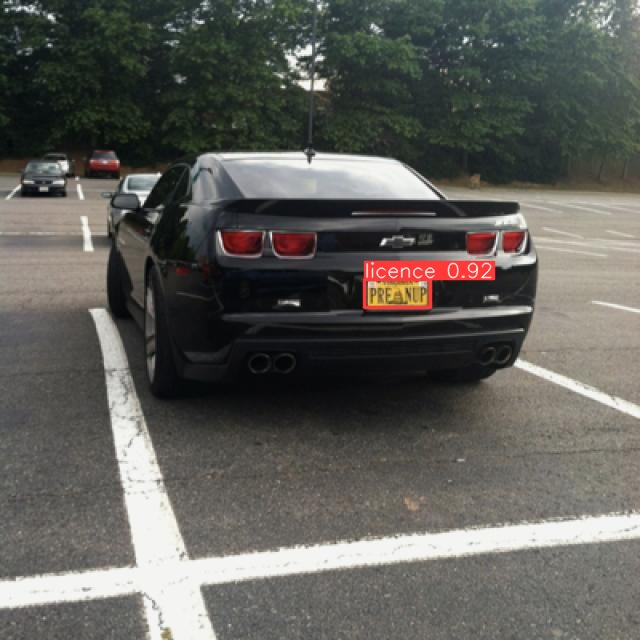

In [16]:
Image(r"runs\detect\predict\Cars2_png.rf.7ae57b5bb53835463ae63245cacfa0b7.jpg")